In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cityblock, euclidean, cosine


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [23]:
df_aa_eq_freq_all = pd.read_csv('SARS-CoV-2-MutSpec/viral_spectra/aminoacid_eq_freq_all_virus.csv', index_col='Unnamed: 0')
df_aa_freq_all = pd.read_csv('SARS-CoV-2-MutSpec/viral_spectra/aminoacid_freq_all_virus.csv')

In [24]:
df_aa_eq_freq_sarscov2 = pd.read_csv('SARS-CoV-2-MutSpec/viral_spectra/aminoacid_eq_freq_sars_cov2.csv', index_col='Unnamed: 0')

In [25]:
df_aa_eq_freq_sarscov2

,taxid,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,2697049,0.002038,0.016902,0.003714,0.00087,0.452024,0.00078,0.009707,0.099336,0.005114,...,0.02327,0.02183,0.005327,0.002274,0.002038,0.058231,0.01198,0.020861,0.003959,0.099336


In [26]:
df_aa_eq_freq_all['taxid'] = df_aa_eq_freq_all['taxid'].astype(int)
df_aa_eq_freq_sarscov2['taxid'] = df_aa_eq_freq_sarscov2['taxid'].astype(int)

In [27]:
df_aa_freq_all[~df_aa_freq_all['taxid'].isin(df_aa_eq_freq_all['taxid'])]

,taxid,refseq_id,M,L,K,V,N,Q,A,I,...,S,G,T,D,R,H,W,E,C,X
2,11320,GCF_000865725.1,0.039465,0.081437,0.061808,0.055126,0.053247,0.038839,0.057214,0.064940,...,0.075799,0.065358,0.062644,0.043850,0.067237,0.017749,0.016496,0.074963,0.018167,0.0
10,12814,GCF_002815455.1,0.023344,0.110271,0.075367,0.052690,0.072921,0.032014,0.042463,0.089373,...,0.080925,0.040907,0.074033,0.049133,0.037128,0.025789,0.008226,0.051578,0.018230,0.0
16,186538,GCF_000848505.1,0.016749,0.100856,0.052066,0.053887,0.046059,0.050428,0.061715,0.059530,...,0.076643,0.056800,0.076097,0.051338,0.052066,0.029674,0.013654,0.055343,0.016384,0.0
19,2697049,GCF_009858895.2,0.022051,0.096473,0.059227,0.081419,0.054067,0.036469,0.068344,0.051452,...,0.067496,0.059368,0.075129,0.051028,0.033995,0.018659,0.011096,0.048131,0.030674,0.0
22,3052310,GCF_000851705.1,0.028724,0.117856,0.066627,0.060113,0.050044,0.039088,0.048268,0.057744,...,0.084987,0.055375,0.053006,0.057744,0.047972,0.022801,0.011253,0.060113,0.025466,0.0
27,38525,GCF_002989735.1,0.028678,0.099091,0.061786,0.070646,0.052460,0.032175,0.064118,0.065750,...,0.081371,0.056890,0.071112,0.047097,0.054092,0.016787,0.011425,0.058988,0.025414,0.0


In [28]:
df_aa_eq_freq_all[~df_aa_eq_freq_all['taxid'].isin(df_aa_freq_all['taxid'])]

,taxid,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
2,113201,0.024711,0.018898,0.032442,0.050634,0.029478,0.031024,0.025840,0.050604,0.135588,...,0.078982,0.086871,0.019683,0.040331,0.024711,0.070987,0.066171,0.048393,0.029495,0.050604
3,113202,0.029160,0.012350,0.031335,0.058119,0.014504,0.030023,0.030435,0.036798,0.173164,...,0.068251,0.093363,0.028322,0.056448,0.029160,0.065579,0.086882,0.035257,0.022907,0.036798


In [29]:
df_type = pd.read_csv('SARS-CoV-2-MutSpec/viral_spectra/taxid_virus_type.csv', index_col='Unnamed: 0')
df_type['taxname'] = df_type['species'].str.split('__').str[0]
df_type.loc[38, ['taxid', 'Type', 'taxname']] = [11320, '-', 'Influenza A virus']
df_type.loc[39, ['taxid', 'Type', 'taxname']] = [2697049, '+', 'Sars-cov-2']
df_type['taxid'] = df_type['taxid'].astype(int)

In [30]:
df_type.head()

,taxid,species,host,gene,comment,Type,taxname
0,38170,Avian orthoreovirus__38170,NaN,NaN,NaN,ds,Avian orthoreovirus
1,1157337,Piscine orthoreovirus__1157337,NaN,NaN,NaN,ds,Piscine orthoreovirus
2,351073,Mammalian orthoreovirus__351073,NaN,NaN,NaN,ds,Mammalian orthoreovirus
3,40054,Epizootic hemorrhagic disease virus__40054,NaN,NaN,NaN,ds,Epizootic hemorrhagic disease virus
4,10990,Rice black streaked dwarf virus__10990,Avena sativa,P1 protein,NaN,ds,Rice black streaked dwarf virus


In [31]:
ex_taxids = [12814, 186538, 3052310, 38525]

In [32]:
# df_aa_eq_freq_all[df_aa_eq_freq_all['taxid'].isin([113201, 113202])].set_index('taxid').mean()

In [33]:
df_aa_eq_freq_all.loc[30] = df_aa_eq_freq_all[df_aa_eq_freq_all['taxid'].isin([113201, 113202])].set_index('taxid').mean()

In [34]:
df_aa_eq_freq_all.loc[30, 'taxid'] = 11320

In [35]:
df_aa_eq_freq_filtered = df_aa_eq_freq_all.drop(2).drop(3)
df_aa_eq_freq_filtered = pd.concat([df_aa_eq_freq_filtered, df_aa_eq_freq_sarscov2])
df_aa_eq_freq_filtered['taxid'] = df_aa_eq_freq_filtered['taxid'].astype(int)
df_aa_eq_freq_filtered = df_aa_eq_freq_filtered.set_index('taxid')
df_aa_eq_freq_filtered['X'] = 0

df_aa_freq_filtered = df_aa_freq_all.set_index('taxid').drop(['refseq_id'], axis=1)

In [38]:
df_aa_eq_freq_filtered.head()

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,X
taxid,,,,,,,,,,,,,,,,,,,,,
10990,0.013889,0.034141,0.013929,0.006193,0.210914,0.007984,0.024231,0.086049,0.015610,0.179583,...,0.035107,0.024161,0.010774,0.013889,0.099730,0.035005,0.049321,0.015180,0.086049,0
11082,0.050774,0.036772,0.035403,0.039154,0.042349,0.067241,0.026733,0.040772,0.043413,0.105310,...,0.039254,0.038340,0.029565,0.050774,0.093878,0.056298,0.077439,0.040668,0.040772,0
1133363,0.017833,0.016765,0.017943,0.014828,0.070616,0.007269,0.044020,0.075580,0.066850,0.133473,...,0.080893,0.043750,0.036378,0.017833,0.093060,0.080397,0.030619,0.013854,0.075580,0
1157337,0.051804,0.031736,0.024652,0.016629,0.057154,0.029510,0.043277,0.044397,0.023263,0.131846,...,0.034487,0.090940,0.029192,0.051804,0.117946,0.072469,0.053144,0.021408,0.044397,0
118655,0.025869,0.021338,0.034749,0.055193,0.030319,0.038868,0.023128,0.049376,0.127720,0.084916,...,0.080411,0.017217,0.036734,0.025869,0.071507,0.059862,0.055229,0.033891,0.049376,0


In [37]:
df_aa_freq_filtered.head()

,M,L,K,V,N,Q,A,I,Y,P,...,S,G,T,D,R,H,W,E,C,X
taxid,,,,,,,,,,,,,,,,,,,,,
10990,0.024014,0.101132,0.066222,0.061991,0.070771,0.032265,0.039141,0.070983,0.042526,0.034486,...,0.090976,0.037554,0.056702,0.062097,0.041680,0.024331,0.007405,0.056702,0.015762,0.0
11082,0.032028,0.087427,0.056481,0.078338,0.037654,0.024670,0.081800,0.050422,0.024886,0.041117,...,0.060593,0.088293,0.074659,0.044579,0.057996,0.020558,0.026401,0.059944,0.020342,0.0
11320,0.039465,0.081437,0.061808,0.055126,0.053247,0.038839,0.057214,0.064940,0.027772,0.039048,...,0.075799,0.065358,0.062644,0.043850,0.067237,0.017749,0.016496,0.074963,0.018167,0.0
1133363,0.031650,0.088671,0.074353,0.048480,0.056267,0.036925,0.049485,0.090681,0.044712,0.034665,...,0.077367,0.041949,0.061291,0.054760,0.040944,0.025119,0.011052,0.055514,0.030394,0.0
1157337,0.029342,0.094342,0.042105,0.076842,0.044474,0.034868,0.072763,0.058947,0.031579,0.053421,...,0.080526,0.061711,0.073947,0.062368,0.053026,0.018553,0.015132,0.043421,0.013421,0.0


## Observed frequency vs Equilibrium frequency

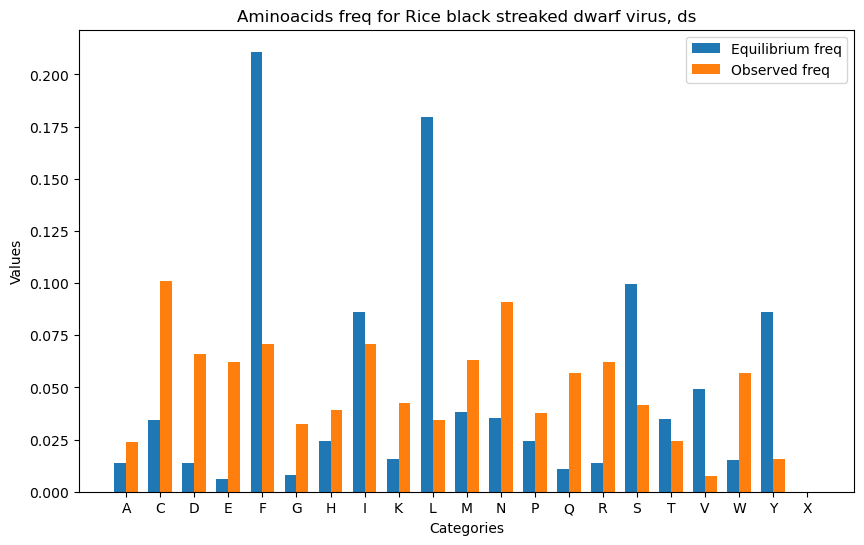

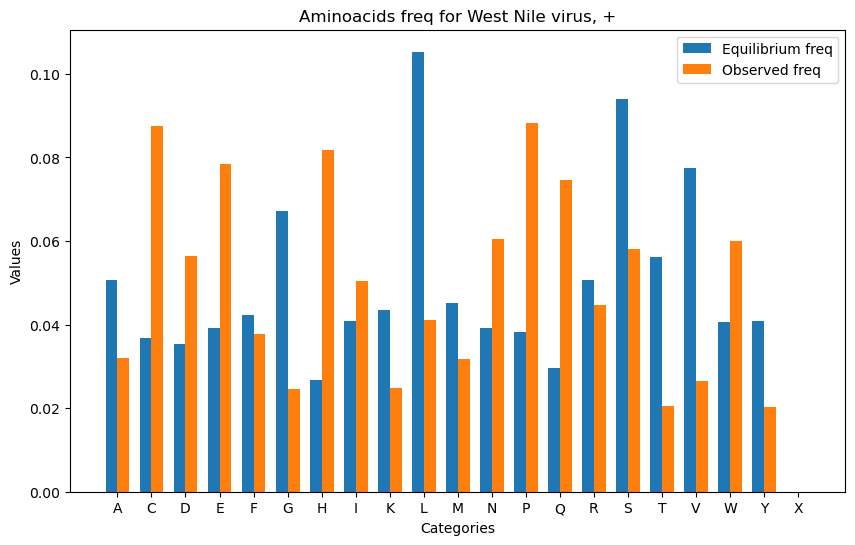

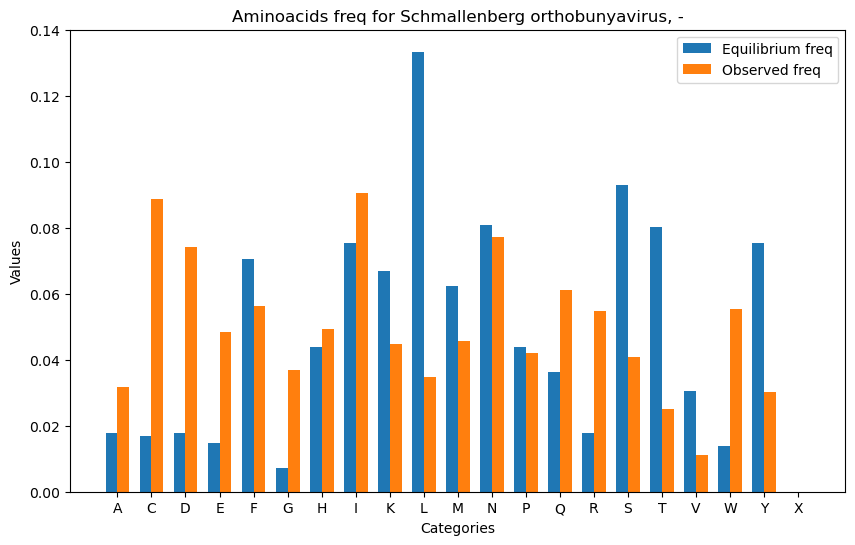

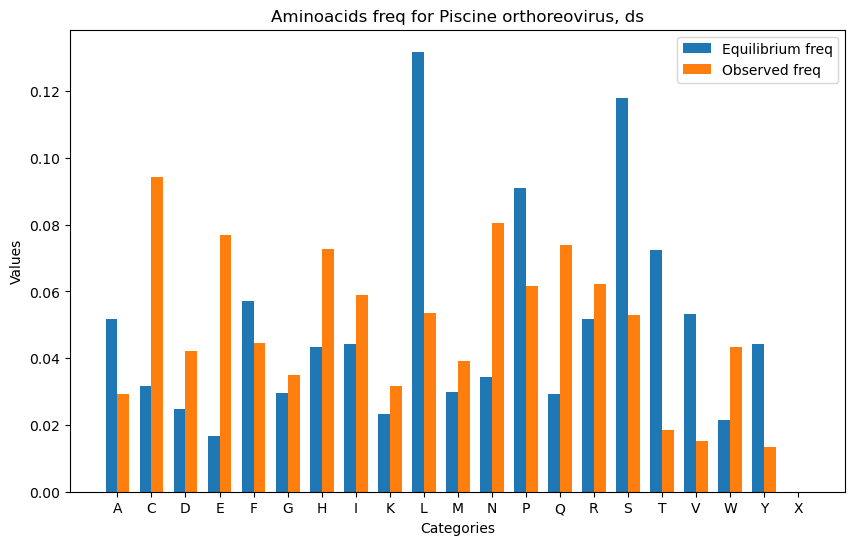

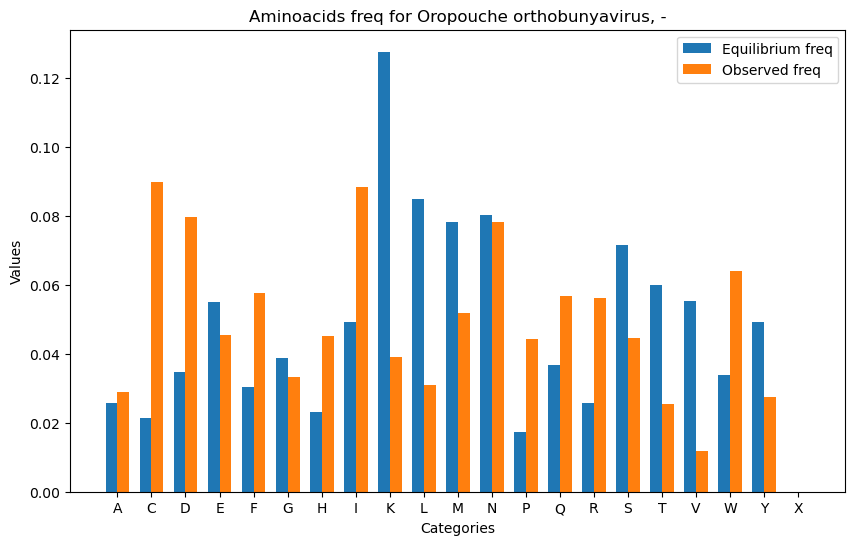

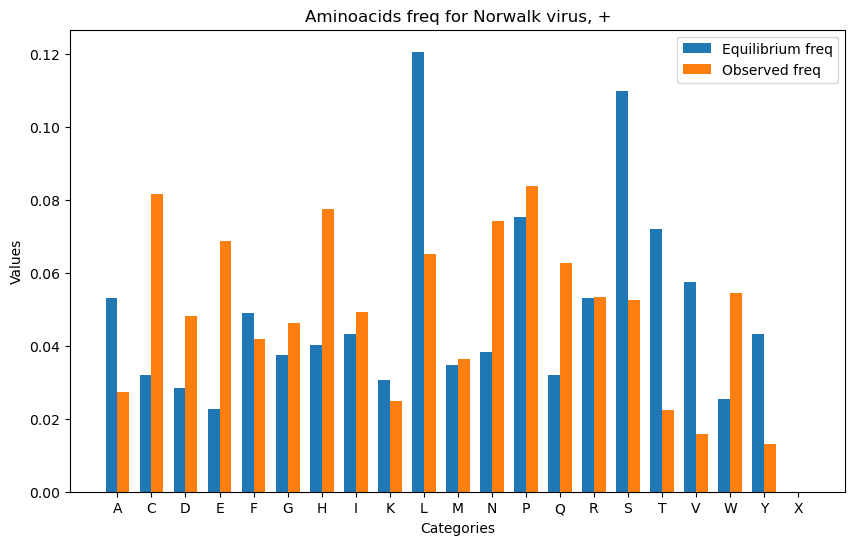

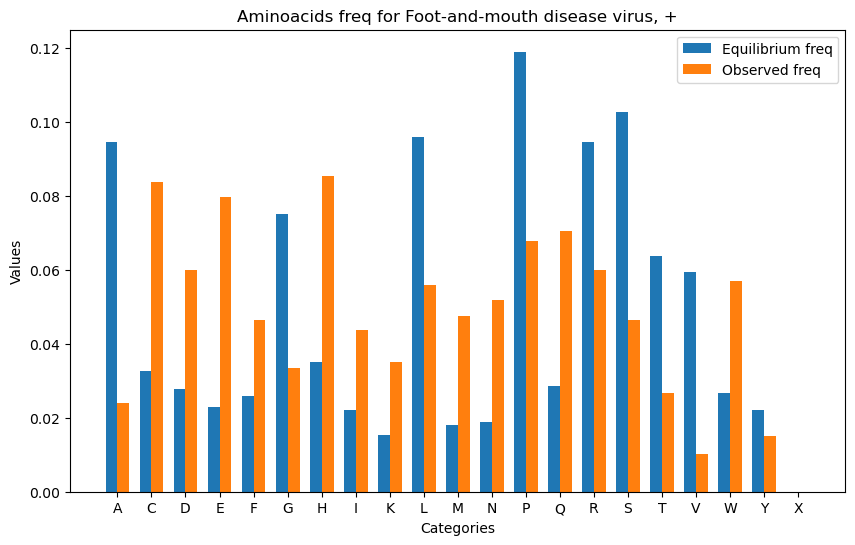

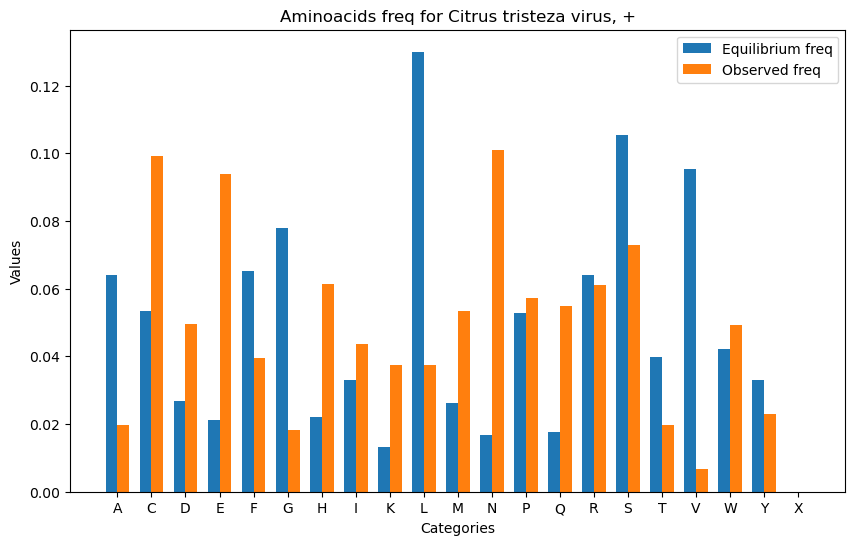

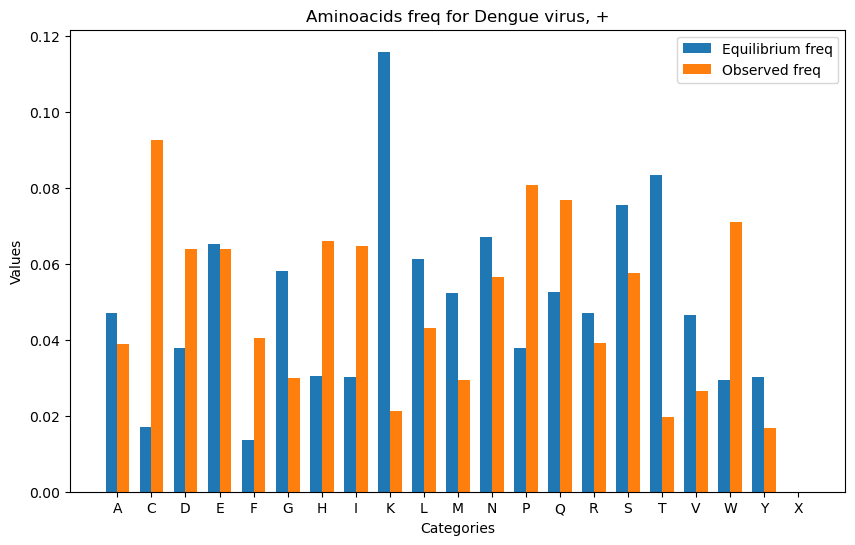

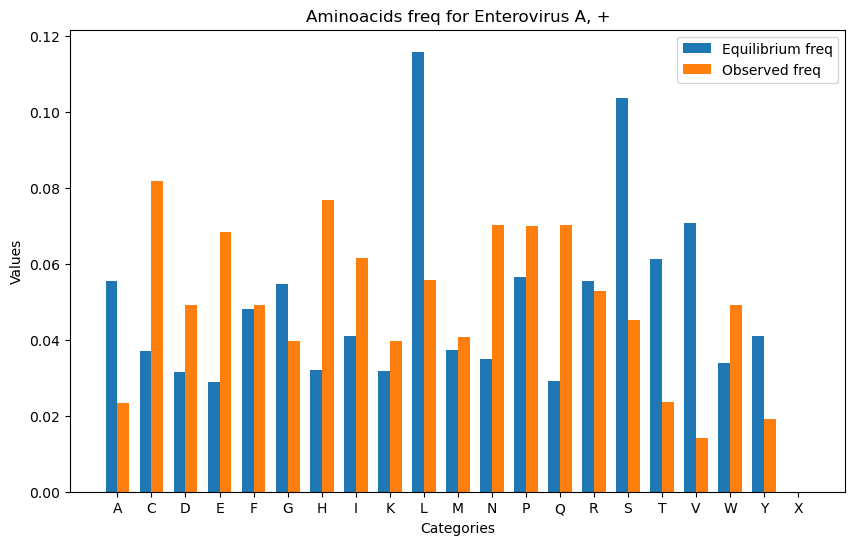

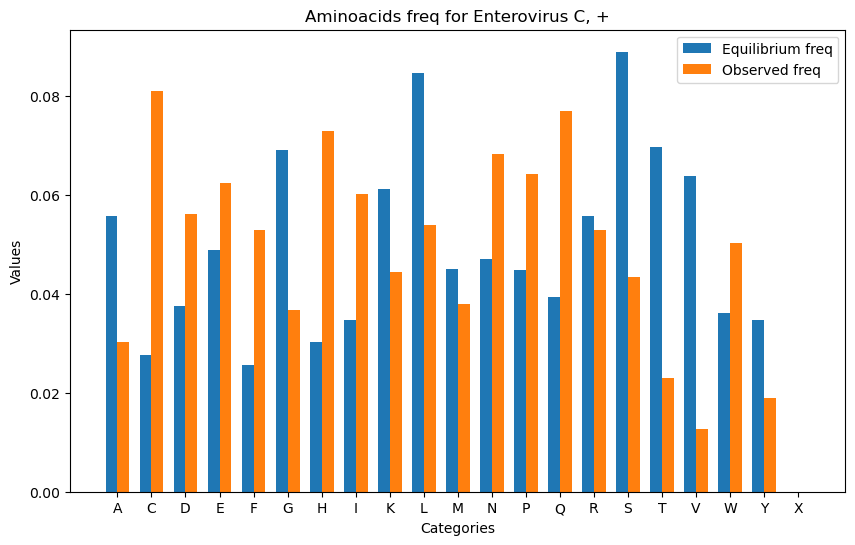

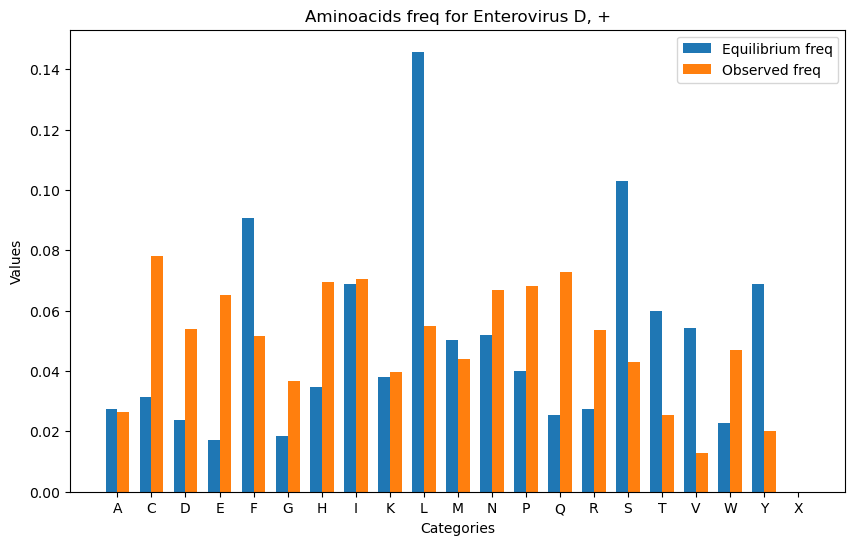

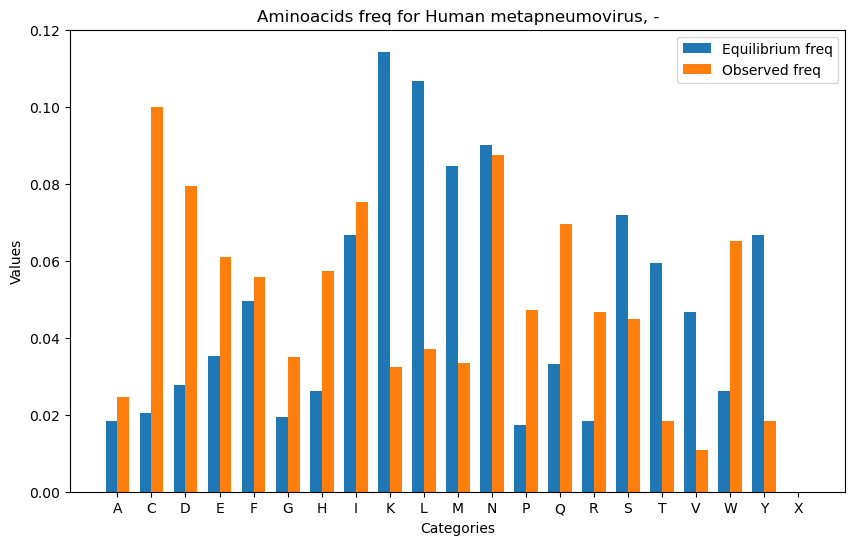

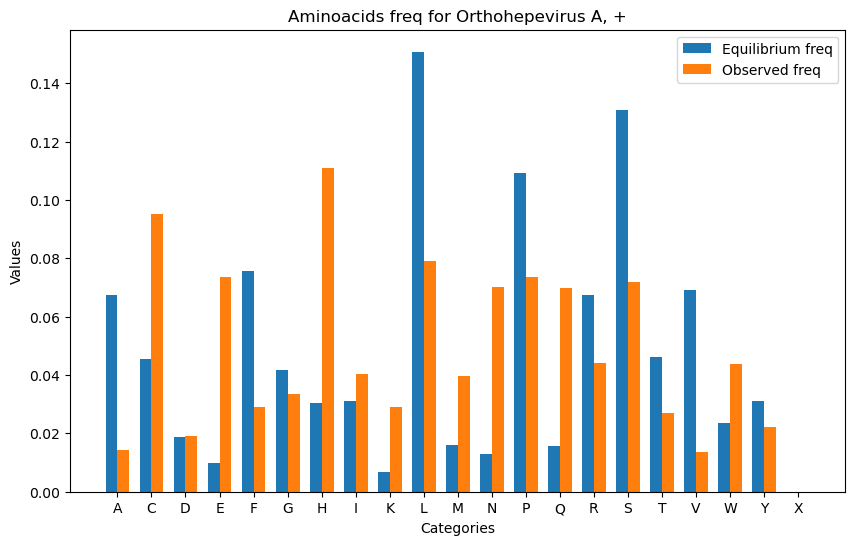

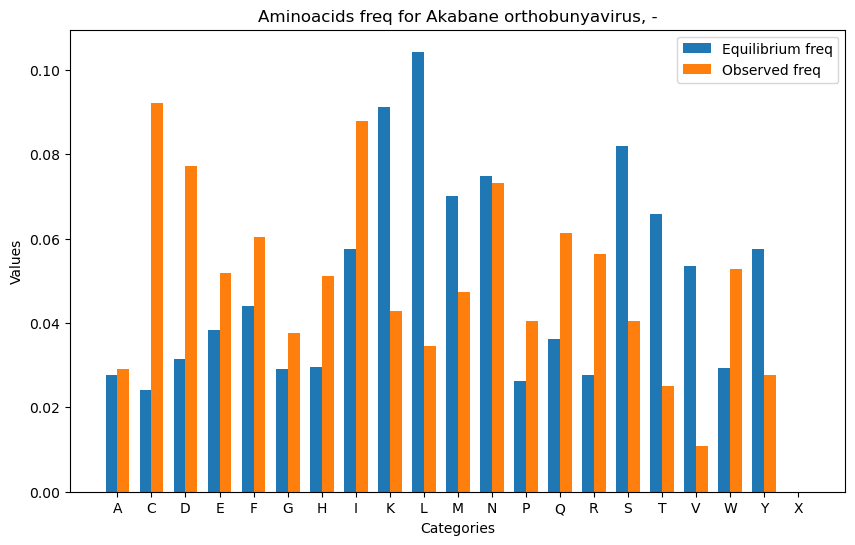

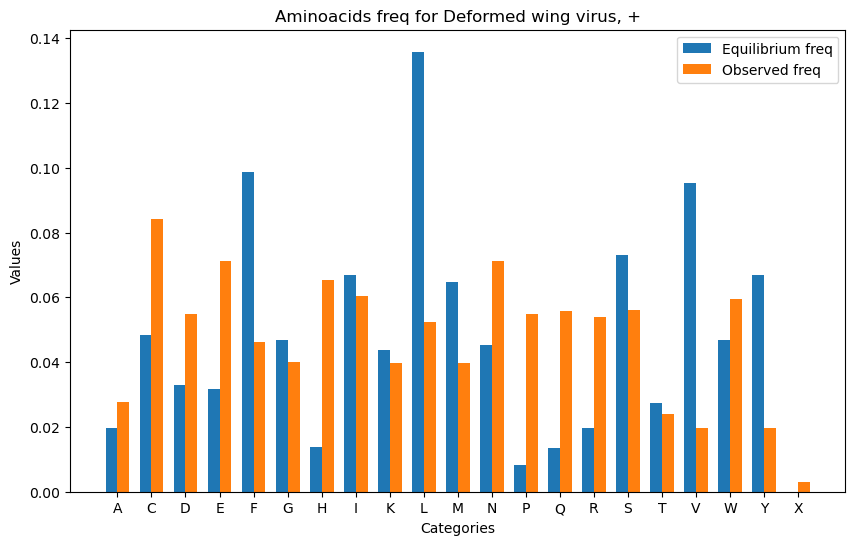

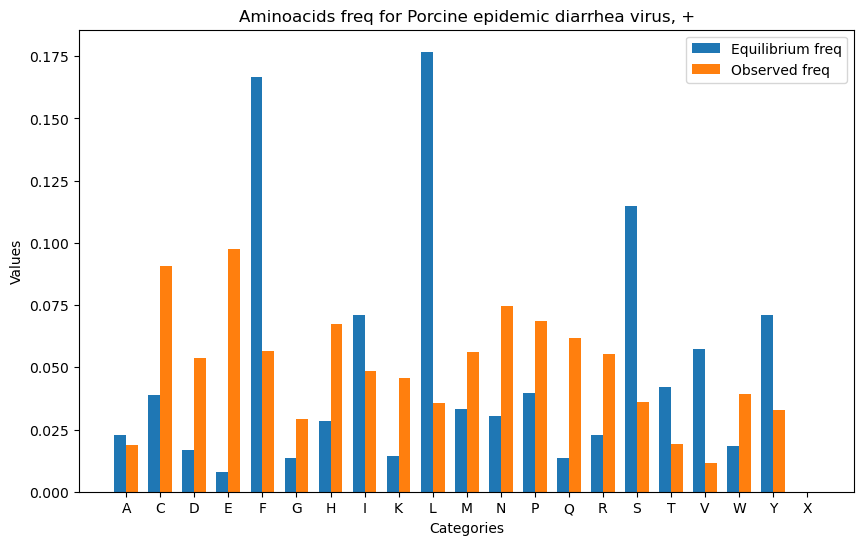

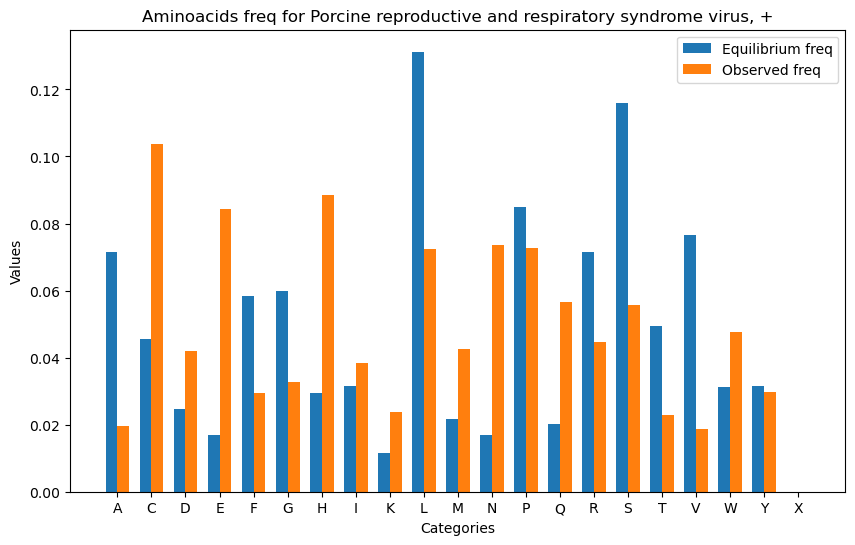

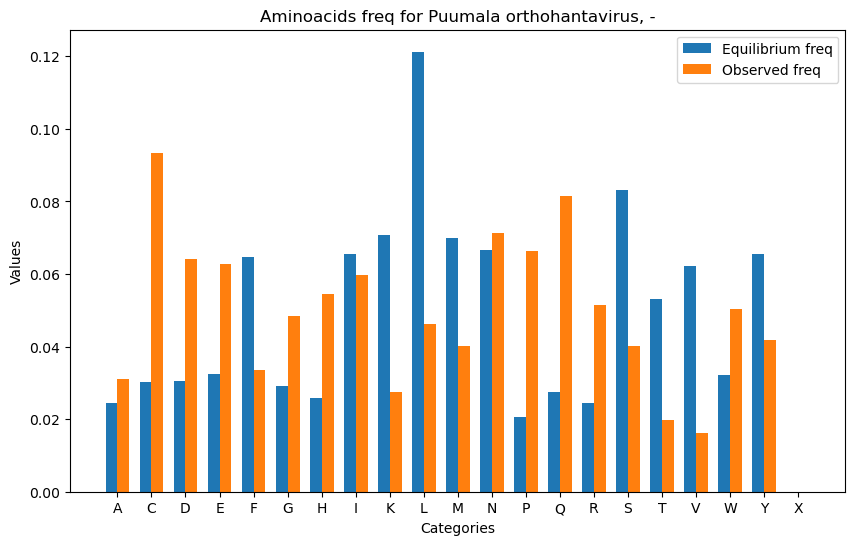

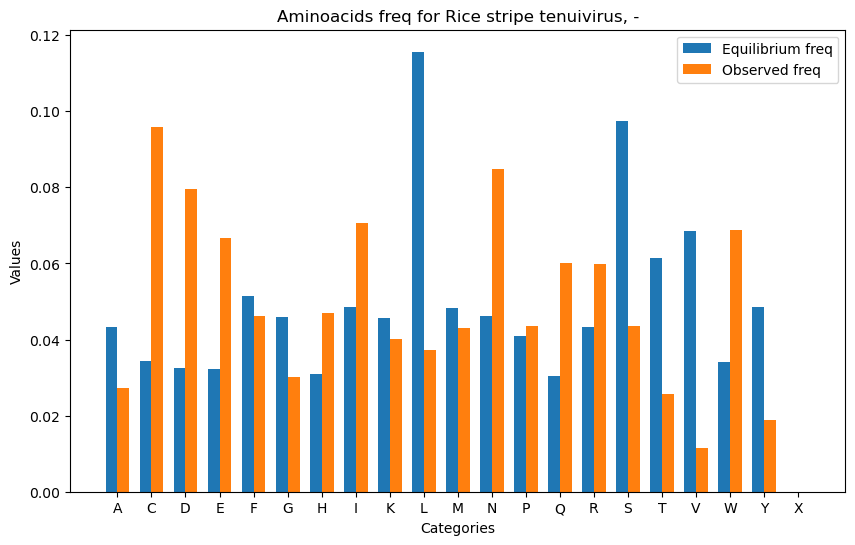

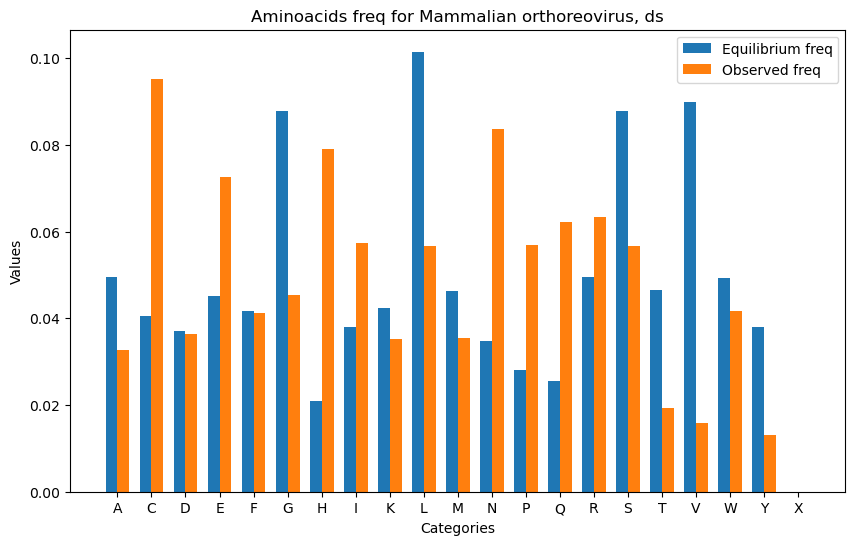

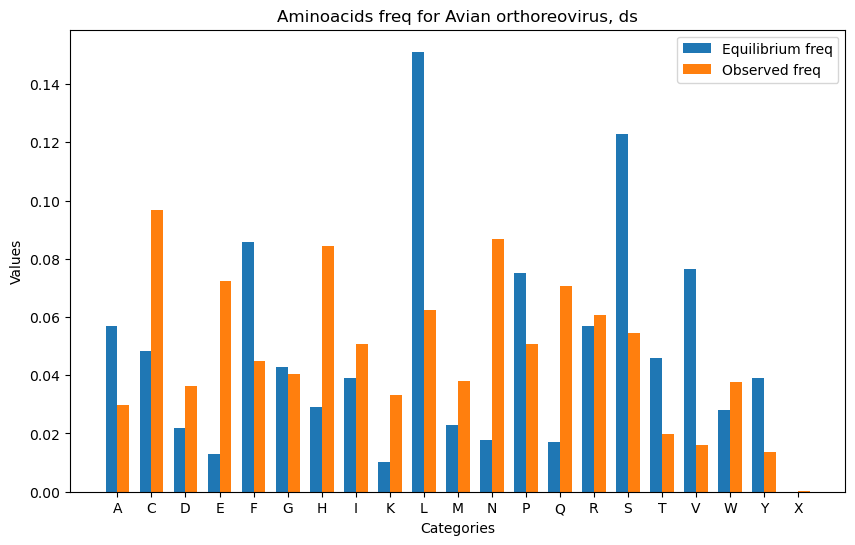

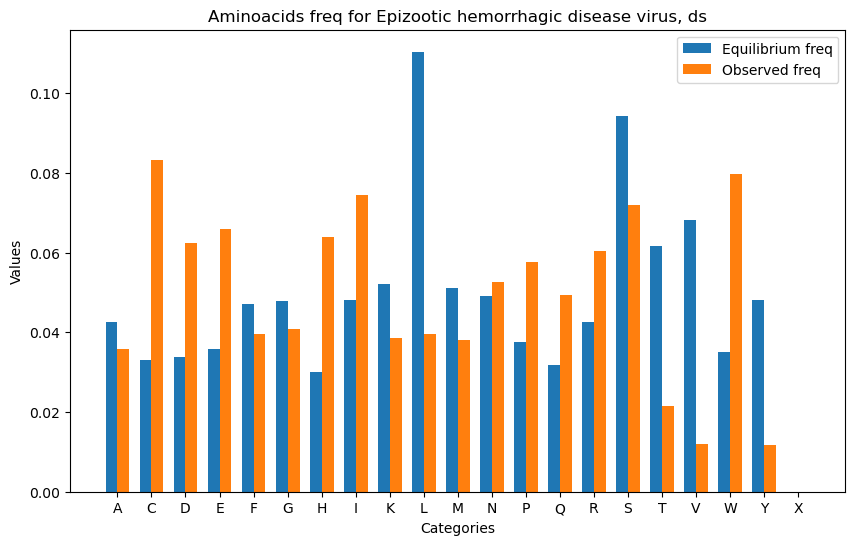

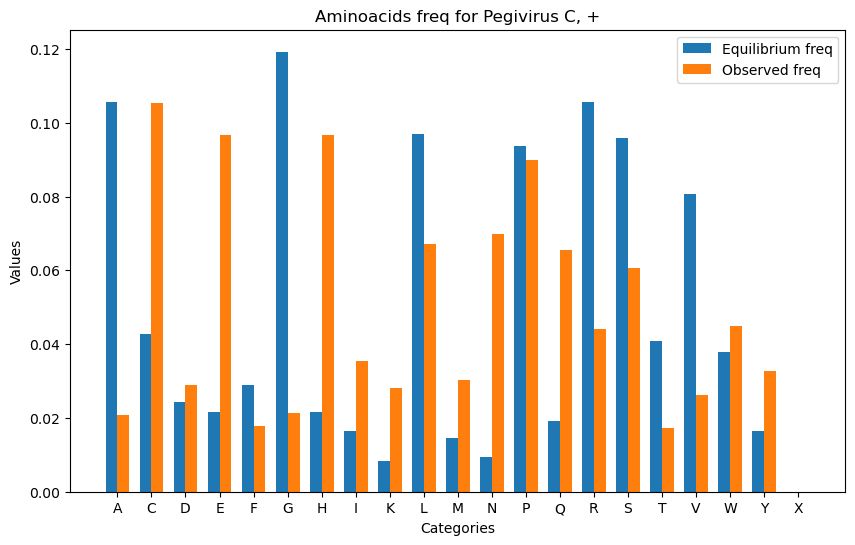

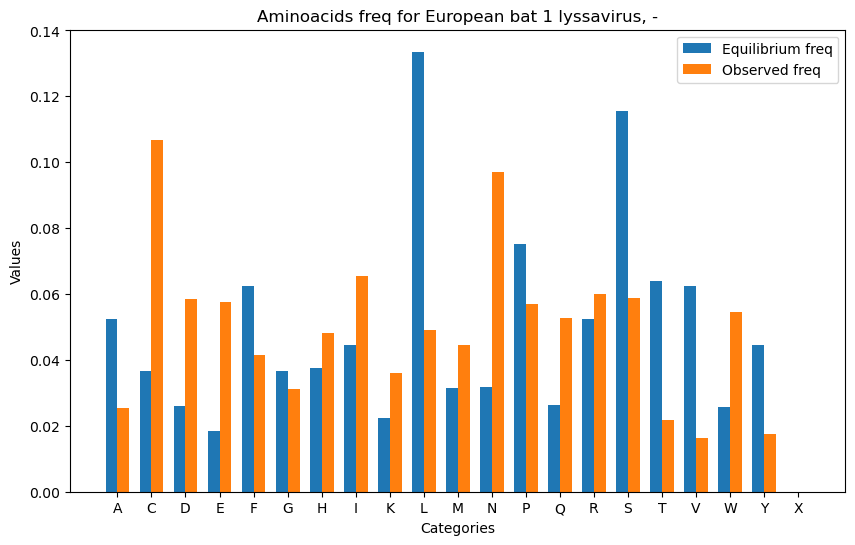

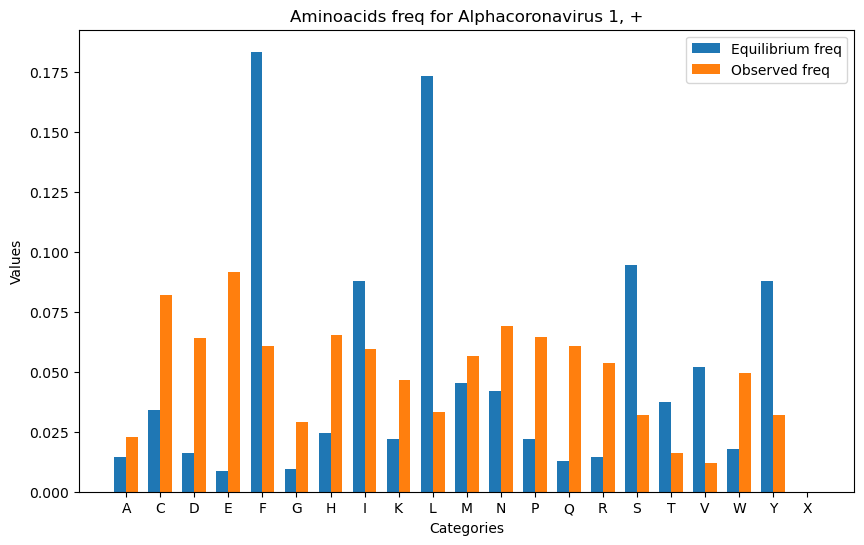

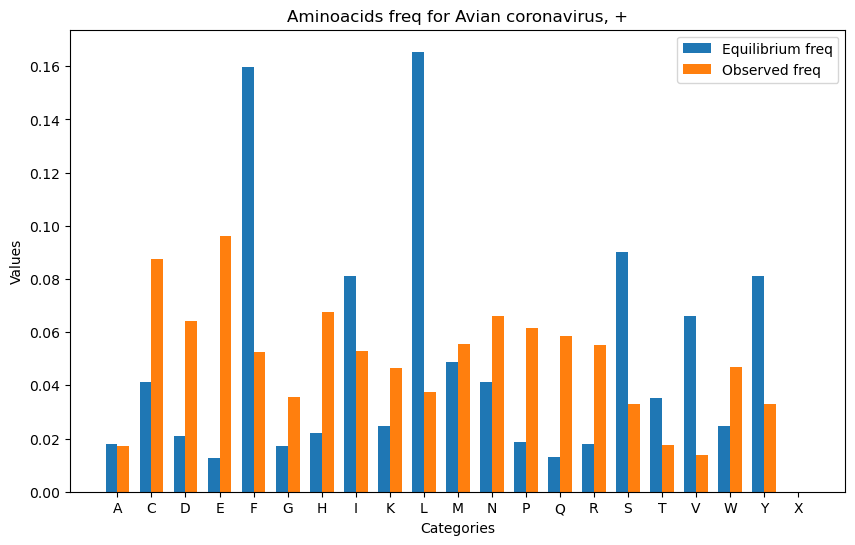

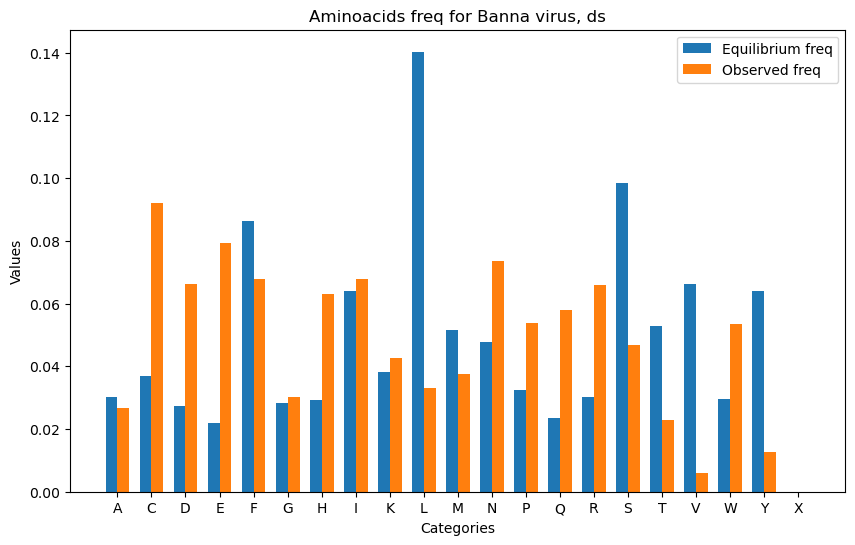

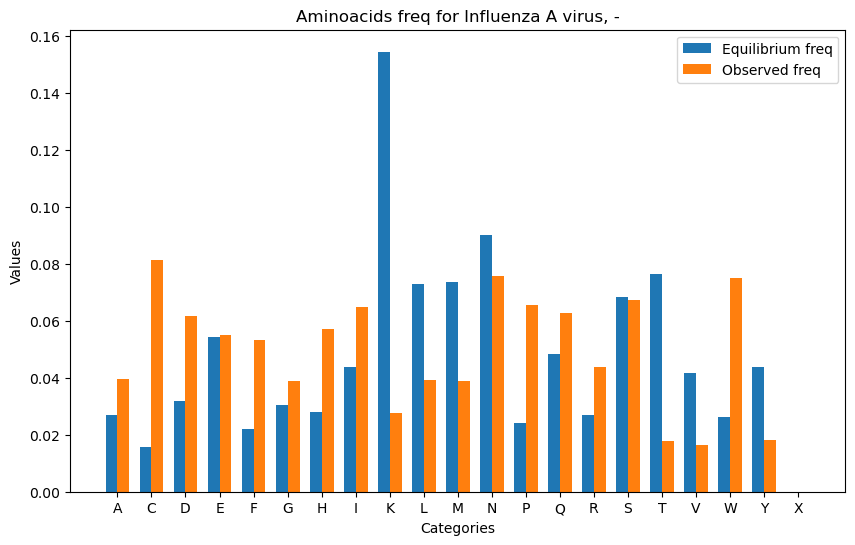

In [14]:
for taxid in df_aa_eq_freq_filtered.index:
    
    taxname = df_type[df_type['taxid'] == taxid]['taxname'].values[0]
    type = df_type[df_type['taxid'] == taxid]['Type'].values[0]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Значения первого набора данных
    indices = np.arange(len(df_aa_eq_freq_filtered.columns))
    bar_width = 0.35
    bars1 = ax.bar(indices, df_aa_eq_freq_filtered.loc[taxid], bar_width, label='Equilibrium freq')
    
    # Значения второго набора данных
    bars2 = ax.bar(indices + bar_width, df_aa_freq_filtered.loc[taxid], bar_width, label='Observed freq')
    
    ax.set_xlabel('Categories')
    ax.set_ylabel('Values')
    ax.set_title(f"Aminoacids freq for {taxname}, {type}")
    ax.set_xticks(indices + bar_width / 2)
    ax.set_xticklabels(df_aa_eq_freq_filtered.columns)
    ax.legend()
    
    plt.show()
    # fig.savefig(f'./SARS-CoV-2-MutSpec/viral_spectra/figures/aa_freqs_plot_{taxid}.pdf')

In [39]:
# sort columns
df_aa_eq_freq_filtered = df_aa_eq_freq_filtered.reindex(sorted(df_aa_eq_freq_filtered.columns), axis=1)
df_aa_freq_filtered = df_aa_freq_filtered.reindex(sorted(df_aa_freq_filtered.columns), axis=1)

In [40]:
manhattan_distance = []
euclidean_distance = []
cosine_distance = []

for taxid in df_aa_eq_freq_filtered.index:
    manhattan_distance.append(cityblock(df_aa_eq_freq_filtered.loc[taxid], df_aa_freq_filtered.loc[taxid]))
    euclidean_distance.append(euclidean(df_aa_eq_freq_filtered.loc[taxid], df_aa_freq_filtered.loc[taxid]))
    cosine_distance.append(cosine(df_aa_eq_freq_filtered.loc[taxid], df_aa_freq_filtered.loc[taxid]))
    

In [41]:
df_aa_distance = pd.DataFrame([manhattan_distance, euclidean_distance, cosine_distance])\
                                .T\
                                .set_index(df_aa_eq_freq_filtered.index)\
                                .rename(columns={0:'manhat_d', 1:'euclid_d', 2:'cosine_d'})

In [42]:
df_aa_distance = df_aa_distance.join(df_type.set_index('taxid')[['Type', 'taxname']])

In [43]:
df_aa_distance.head()

,manhat_d,euclid_d,cosine_d,Type,taxname
taxid,,,,,
10990,0.667698,0.207230,0.214754,ds,Rice black streaked dwarf virus
11082,0.268042,0.071301,0.042858,+,West Nile virus
1133363,0.443176,0.112842,0.092571,-,Schmallenberg orthobunyavirus
1157337,0.386249,0.102799,0.079921,ds,Piscine orthoreovirus
118655,0.337891,0.097985,0.076769,-,Oropouche orthobunyavirus


In [49]:
df_aa_distance

,manhat_d,euclid_d,cosine_d,Type,taxname
taxid,,,,,
10990,0.667698,0.207230,0.214754,ds,Rice black streaked dwarf virus
11082,0.268042,0.071301,0.042858,+,West Nile virus
1133363,0.443176,0.112842,0.092571,-,Schmallenberg orthobunyavirus
1157337,0.386249,0.102799,0.079921,ds,Piscine orthoreovirus
118655,0.337891,0.097985,0.076769,-,Oropouche orthobunyavirus
11983,0.359233,0.096635,0.075755,+,Norwalk virus
12110,0.466241,0.128106,0.120067,+,Foot-and-mouth disease virus
12162,0.323010,0.090706,0.060546,+,Citrus tristeza virus
12637,0.326570,0.092122,0.070259,+,Dengue virus


## Distance between observed and equilibrium aa freqs

<Axes: xlabel='taxid', ylabel='manhat_d'>

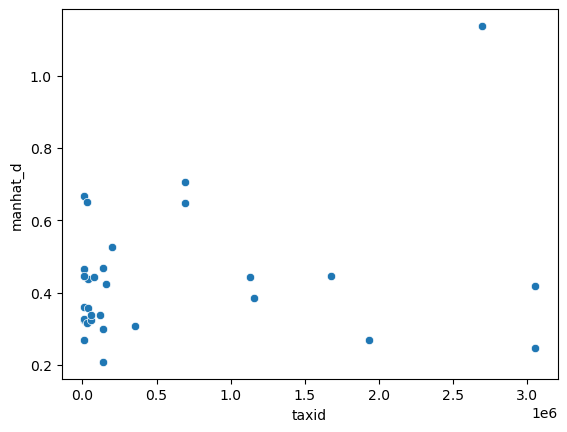

In [44]:
sns.scatterplot(df_aa_distance['manhat_d'])

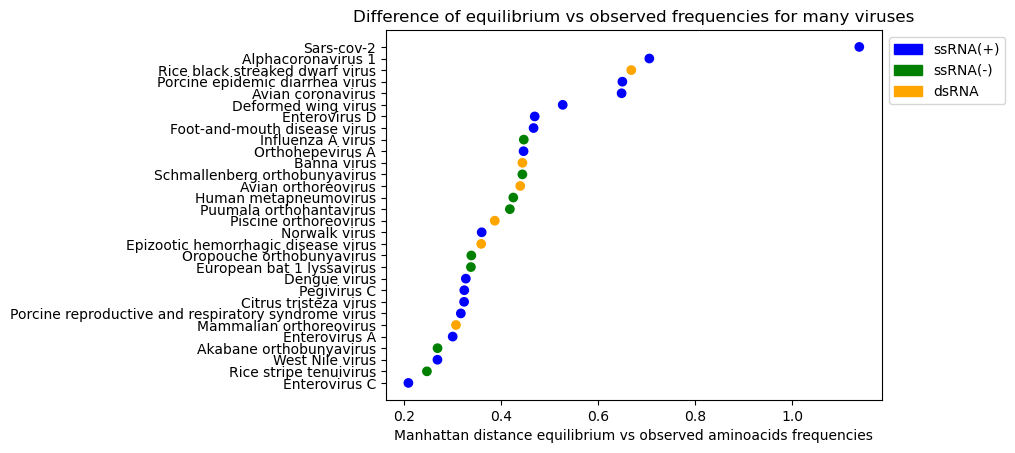

In [45]:
colors = ['blue' if type == '+' else 'green' if type == '-' else 'orange' for type in df_aa_distance.sort_values('manhat_d')['Type'] ]

fig, ax = plt.subplots()

ax.scatter(df_aa_distance['manhat_d'].sort_values(), range(len(df_aa_distance.index)), c=colors)
ax.set_yticks(range(len(df_aa_distance.index)))
ax.set_yticklabels(df_aa_distance.sort_values('manhat_d')['taxname'])
ax.set_xlabel('Manhattan distance equilibrium vs observed aminoacids frequencies')
ax.set_title('Difference of equilibrium vs observed frequencies for many viruses')

legend_labels = {'blue': 'ssRNA(+)', 'green': 'ssRNA(-)', 'orange': 'dsRNA'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
ax.legend(handles=patches, bbox_to_anchor=(1, 1), loc="upper left")

plt.show()

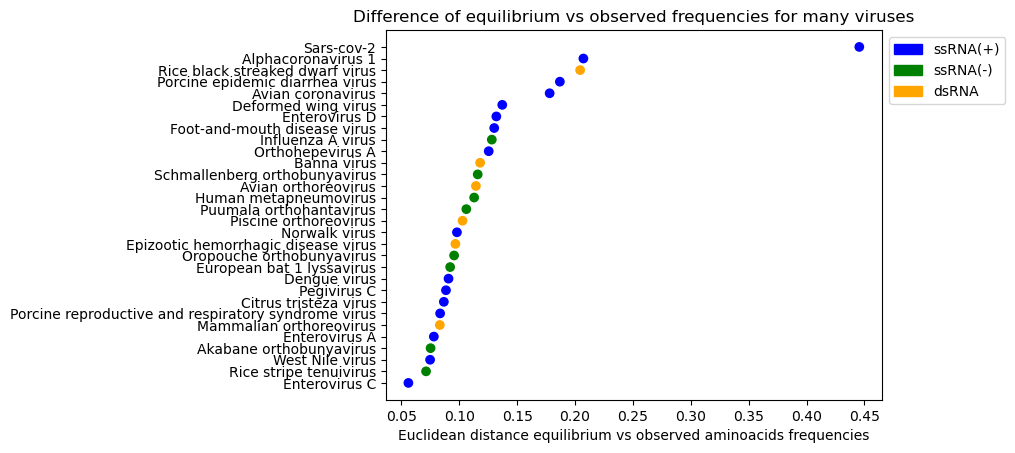

In [46]:
colors = ['blue' if type == '+' else 'green' if type == '-' else 'orange' for type in df_aa_distance.sort_values('manhat_d')['Type'] ]

fig, ax = plt.subplots()

ax.scatter(df_aa_distance['euclid_d'].sort_values(), range(len(df_aa_distance.index)), c=colors)
ax.set_yticks(range(len(df_aa_distance.index)))
ax.set_yticklabels(df_aa_distance.sort_values('manhat_d')['taxname'])
ax.set_xlabel('Euclidean distance equilibrium vs observed aminoacids frequencies')
ax.set_title('Difference of equilibrium vs observed frequencies for many viruses')

legend_labels = {'blue': 'ssRNA(+)', 'green': 'ssRNA(-)', 'orange': 'dsRNA'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
ax.legend(handles=patches, bbox_to_anchor=(1, 1), loc="upper left")

plt.show()

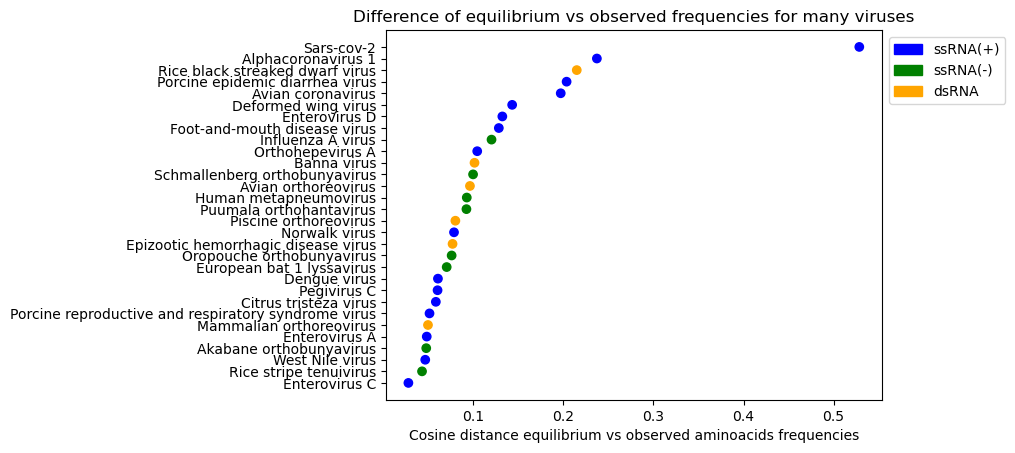

In [47]:
colors = ['blue' if type == '+' else 'green' if type == '-' else 'orange' for type in df_aa_distance.sort_values('manhat_d')['Type'] ]

fig, ax = plt.subplots()

ax.scatter(df_aa_distance['cosine_d'].sort_values(), range(len(df_aa_distance.index)), c=colors)
ax.set_yticks(range(len(df_aa_distance.index)))
ax.set_yticklabels(df_aa_distance.sort_values('manhat_d')['taxname'])
ax.set_xlabel('Cosine distance equilibrium vs observed aminoacids frequencies')
ax.set_title('Difference of equilibrium vs observed frequencies for many viruses')

legend_labels = {'blue': 'ssRNA(+)', 'green': 'ssRNA(-)', 'orange': 'dsRNA'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
ax.legend(handles=patches, bbox_to_anchor=(1, 1), loc="upper left")

plt.show()

In [48]:
df_aa_distance['manhat_d'].sort_values()

taxid
138950     0.208143
3052763    0.246355
11082      0.268042
1933178    0.268225
138948     0.299458
351073     0.306253
28344      0.316293
12162      0.323010
54290      0.323410
12637      0.326570
57482      0.337061
118655     0.337891
40054      0.358278
11983      0.359233
1157337    0.386249
3052493    0.417320
162145     0.424436
38170      0.438808
1133363    0.443176
77763      0.443209
1678143    0.445620
11320      0.446089
12110      0.466241
138951     0.468574
198112     0.526308
694014     0.647744
28295      0.649378
10990      0.667698
693997     0.704919
2697049    1.137824
Name: manhat_d, dtype: float64

In [55]:
df_aa_freq_all.set_index('taxid').join(df_type.set_index('taxid')[['Type', 'taxname']])[['refseq_id', 'Type', 'taxname']]

,refseq_id,Type,taxname
taxid,,,
10990,GCF_000852945.1,ds,Rice black streaked dwarf virus
11082,GCF_000861085.1,+,West Nile virus
11320,GCF_000865725.1,-,Influenza A virus
1133363,GCF_004789575.1,-,Schmallenberg orthobunyavirus
1157337,GCF_002829625.1,ds,Piscine orthoreovirus
118655,GCF_000853785.1,-,Oropouche orthobunyavirus
11983,GCF_000864005.1,+,Norwalk virus
12110,GCF_002816555.1,+,Foot-and-mouth disease virus
12162,GCF_000862265.1,+,Citrus tristeza virus
